## Crypto Arbitrage

This project sorts through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. The task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This project consist's of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the bitstamp Data

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna().copy()
bitstamp.isnull().sum()


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp["Close"] = bitstamp["Close"].str.replace("$", "")
bitstamp["Close"]

/Users/colefrederick/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00     13620.0
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129067, dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp["Close"] = bitstamp["Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated()

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129067, dtype: bool

## Prepare the Coinbase Data

1. For the coinbase DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

### Step 1: For the coinbase DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [10]:
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase = coinbase.dropna().copy()
coinbase.isnull().sum()


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [11]:
# Use the str.replace function to remove the dollar sign, $
coinbase["Close"] = coinbase["Close"].str.replace("$", "")
coinbase["Close"]


/Users/colefrederick/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00     13580.0
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
                         ...   
2018-03-31 23:55:00      6930.0
2018-03-31 23:56:00     6930.01
2018-03-31 23:57:00     6933.91
2018-03-31 23:58:00     6937.31
2018-03-31 23:59:00      6934.0
Name: Close, Length: 129322, dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [12]:
# Convert the Close data type to a float
coinbase["Close"] = coinbase["Close"].astype("float")

coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [13]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated()

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129322, dtype: bool

## Analyze the Data

Analysis consists of the following: 

1. Choose the columns of data on which to focus the analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus the analysis.

Select the data to be analyzed. Useing `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [14]:
# Use iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.tail()


,Close
Timestamp,
2018-03-31 23:55:00,6922.56
2018-03-31 23:56:00,6920.32
2018-03-31 23:57:00,6934.72
2018-03-31 23:58:00,6927.65
2018-03-31 23:59:00,6928.01


In [15]:
# Use iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities.

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Tailoring the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that from Step 2 for bitstamp and coinbase. Legend and title adjusted for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. The goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define.

In [16]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [17]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp BTC'}, xlabel='Timestamp'>

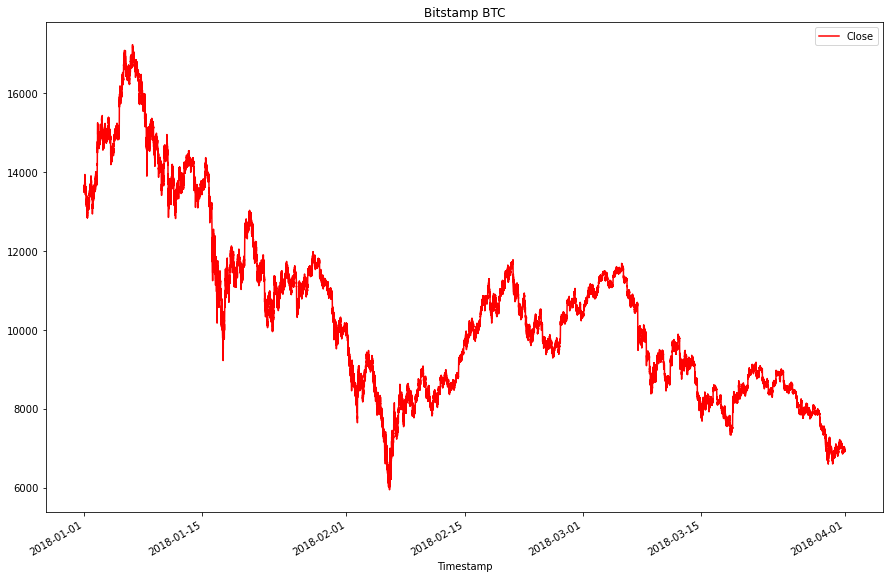

In [18]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="Bitstamp BTC", color="red")


<AxesSubplot:title={'center':'Coinbase BTC'}, xlabel='Timestamp'>

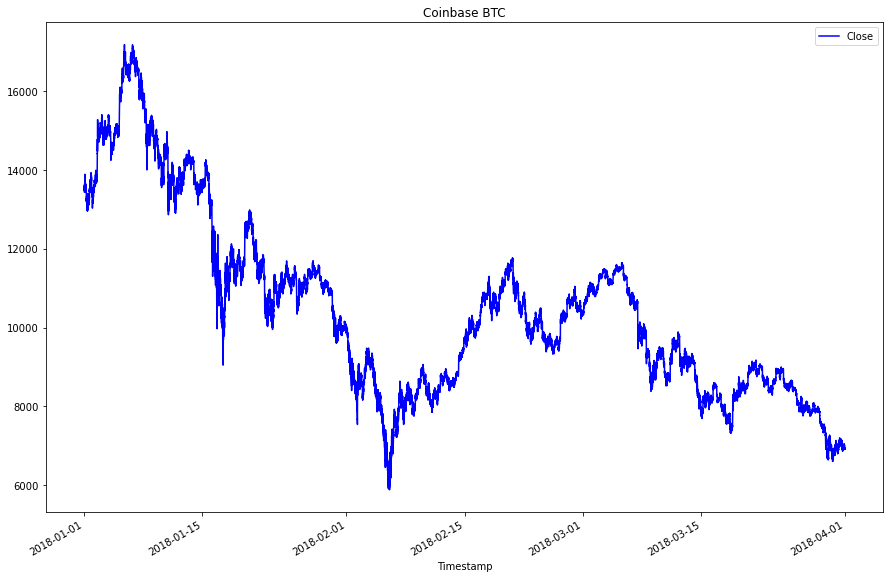

In [19]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
coinbase_sliced.plot(legend=True, figsize=(15, 10), title="Coinbase BTC", color="blue")


<AxesSubplot:title={'center':'Bitstamp BTC vs Coinbase BTC'}, xlabel='Timestamp'>

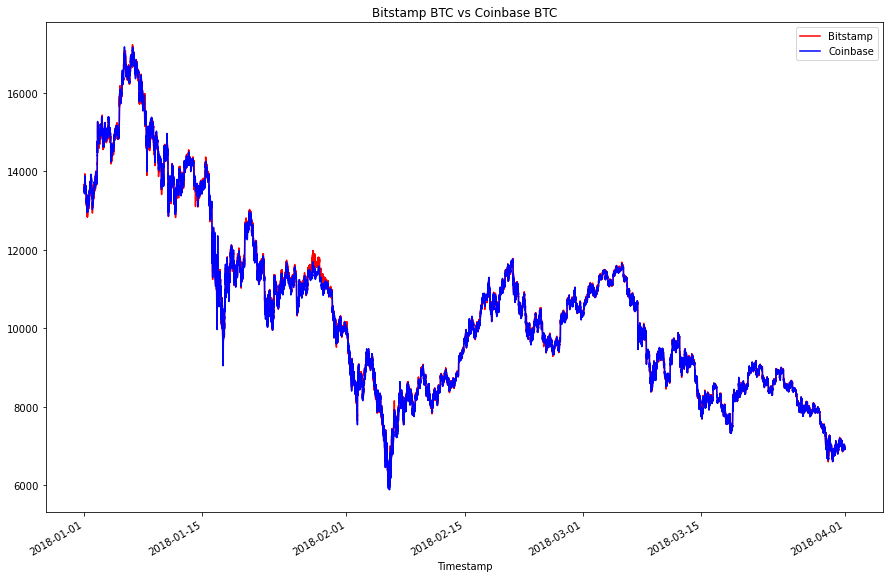

In [20]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# Plot visualizes the prices over the full lenth of the dataset
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp BTC vs Coinbase BTC", color="red", label="Bitstamp")
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 10), color="blue", label="Coinbase")


<AxesSubplot:title={'center':'Bitstamp BTC vs Coinbase BTC: January 2018'}, xlabel='Timestamp'>

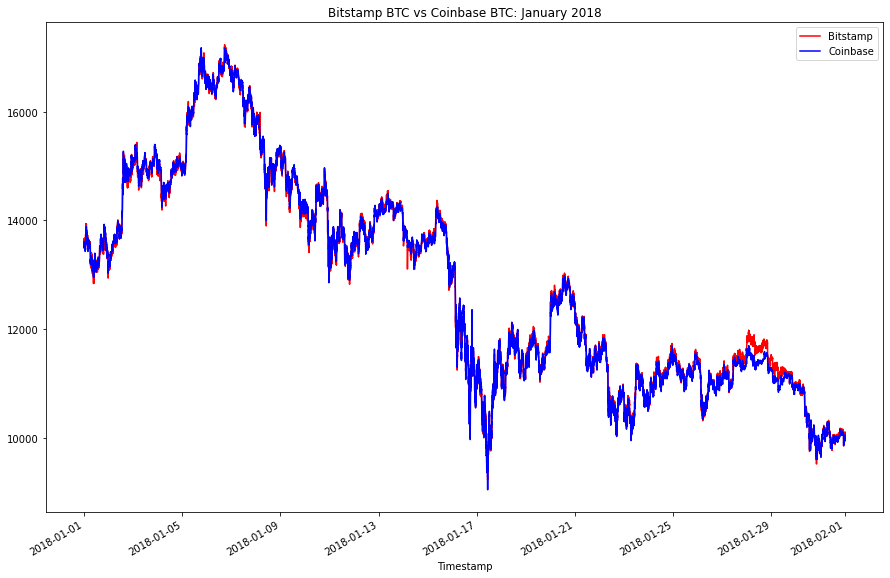

In [21]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
bitstamp_sliced['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp BTC vs Coinbase BTC: January 2018", color="red", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp BTC vs Coinbase BTC: March 2018'}, xlabel='Timestamp'>

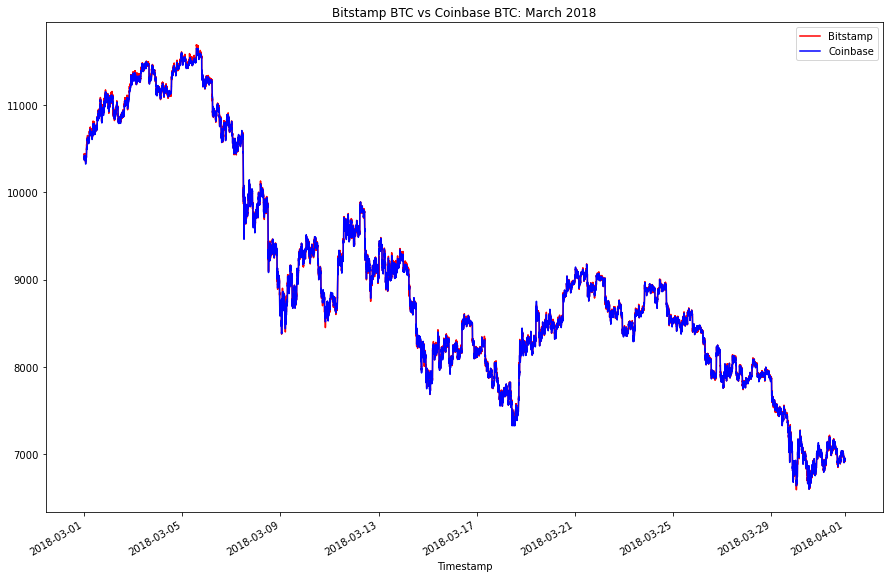

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
bitstamp_sliced['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp BTC vs Coinbase BTC: March 2018", color="red", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

### Step 3: Focus Analysis on Specific Dates

Focus the analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. 

<AxesSubplot:title={'center':'Bitstamp BTC vs Coinbase BTC: January 28th, 2018'}, xlabel='Timestamp'>

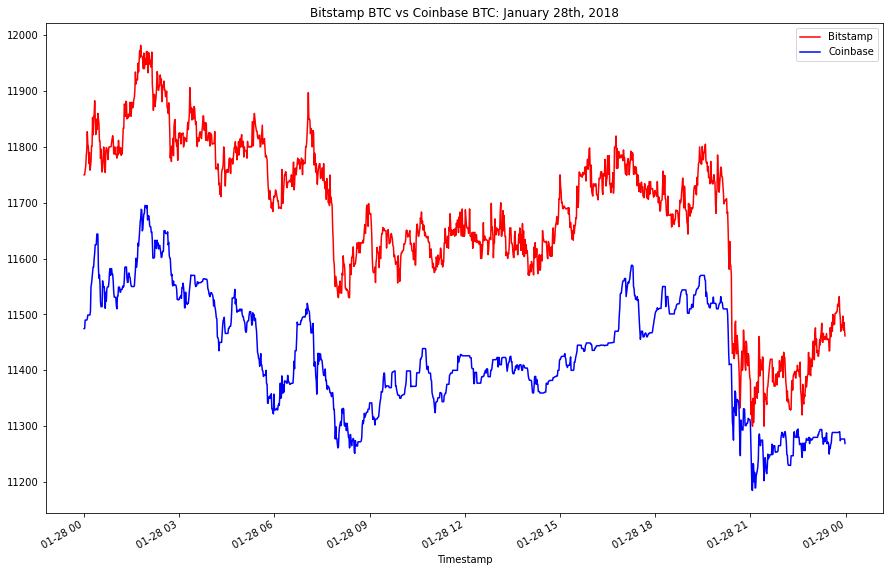

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
bitstamp_sliced['Close'].loc['2018-01-28' : '2018-01-28'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp BTC vs Coinbase BTC: January 28th, 2018", color="red", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-28' : '2018-01-28'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

In [24]:
# Using the early date that has been selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced['Close'].loc['2018-01-28' : '2018-01-28'] - coinbase_sliced['Close'].loc['2018-01-28' : '2018-01-28']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BTC spread: Bitstamp - Coinbase (January 28th, 2018)'}>

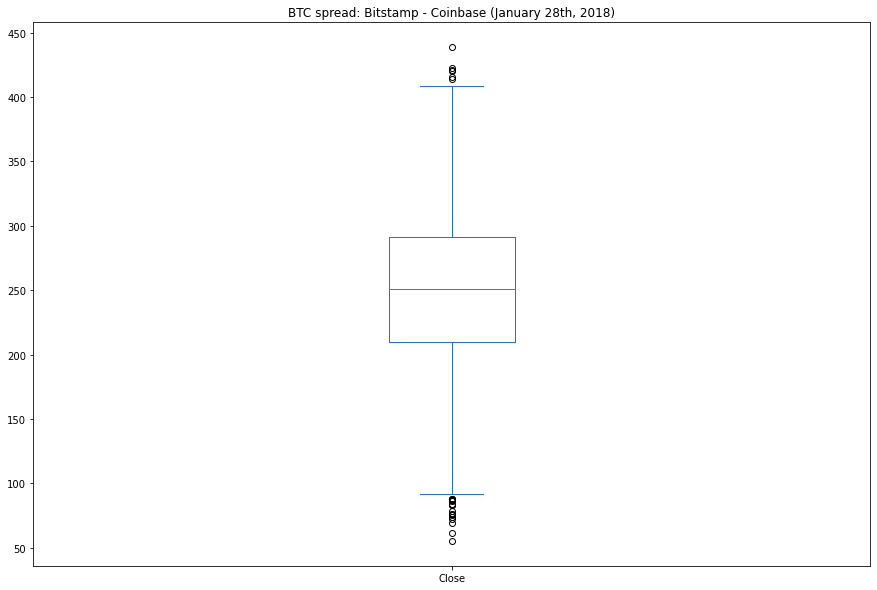

In [25]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', legend=True, figsize=(15, 10), title="BTC spread: Bitstamp - Coinbase (January 28th, 2018)")

<AxesSubplot:title={'center':'Bitstamp BTC vs Coinbase BTC: February 28 2018'}, xlabel='Timestamp'>

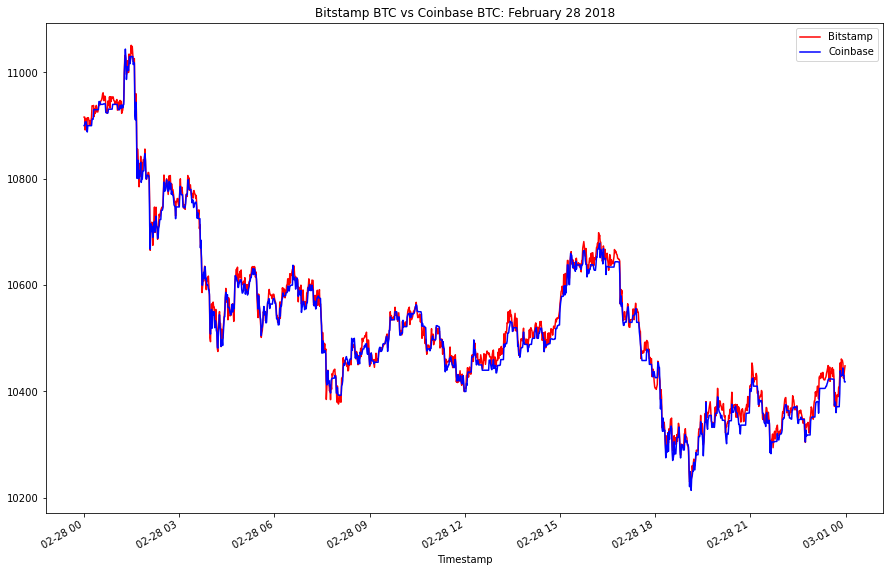

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
bitstamp_sliced['Close'].loc['2018-02-28' : '2018-02-28'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp BTC vs Coinbase BTC: February 28 2018", color="red", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-28' : '2018-02-28'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

In [27]:
# Using the middle date that has been selected selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced['Close'].loc['2018-02-28' : '2018-02-28'] - coinbase_sliced['Close'].loc['2018-02-28' : '2018-02-28']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1430.000000
mean        7.755825
std        11.296502
min       -35.000000
25%         0.145000
50%         7.815000
75%        15.207500
max        46.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BTC spread: Bitstamp - Coinbase (February 28th, 2018)'}>

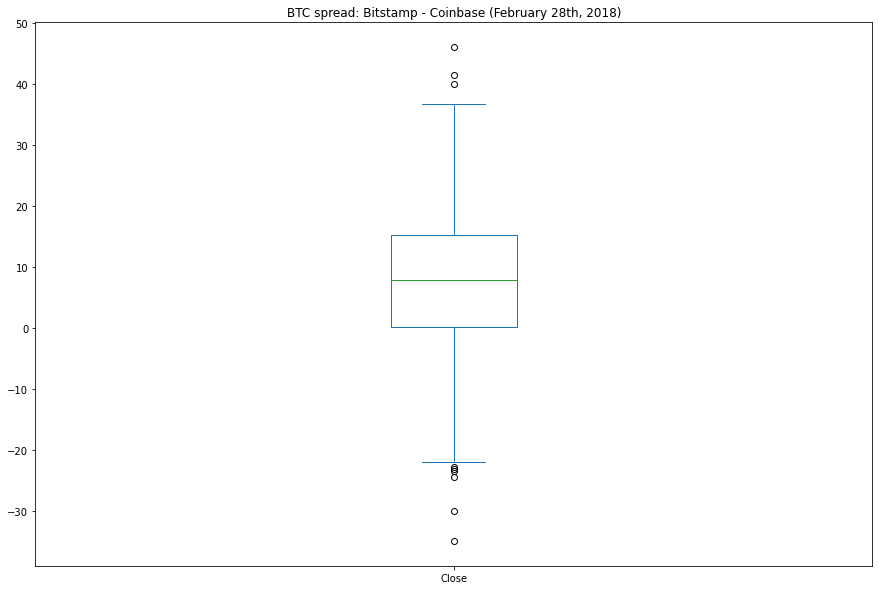

In [28]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', legend=True, figsize=(15, 10), title="BTC spread: Bitstamp - Coinbase (February 28th, 2018)")

<AxesSubplot:title={'center':'Bitstamp BTC vs Coinbase BTC: March 28 2018'}, xlabel='Timestamp'>

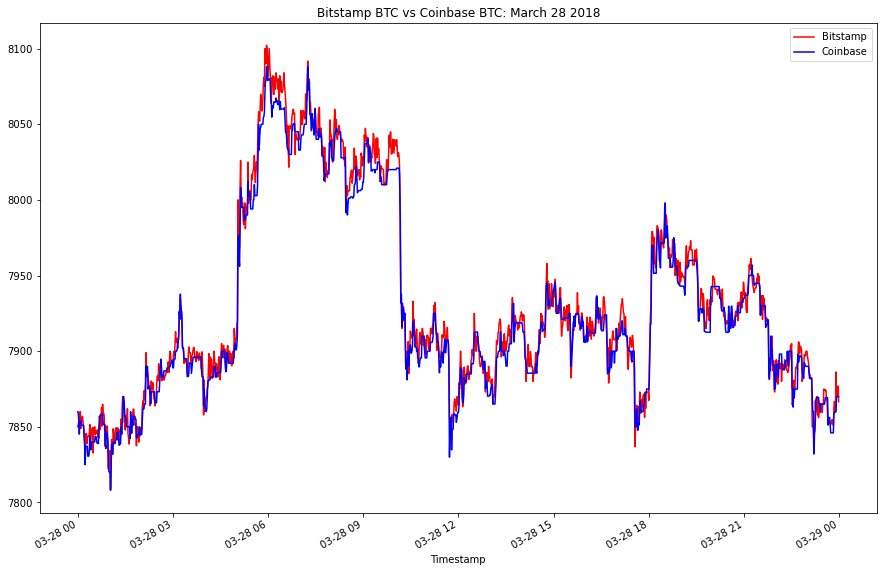

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
bitstamp_sliced['Close'].loc['2018-03-28' : '2018-03-28'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp BTC vs Coinbase BTC: March 28 2018", color="red", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-28' : '2018-03-28'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

In [30]:
# Using the later date that has been selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced['Close'].loc['2018-03-28' : '2018-03-28'] - coinbase_sliced['Close'].loc['2018-03-28' : '2018-03-28']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()


count    1438.00000
mean        4.42427
std         7.44509
min       -26.30000
25%        -0.48000
50%         4.53500
75%         8.99000
max        28.73000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BTC spread: Bitstamp - Coinbase (March 28th, 2018)'}>

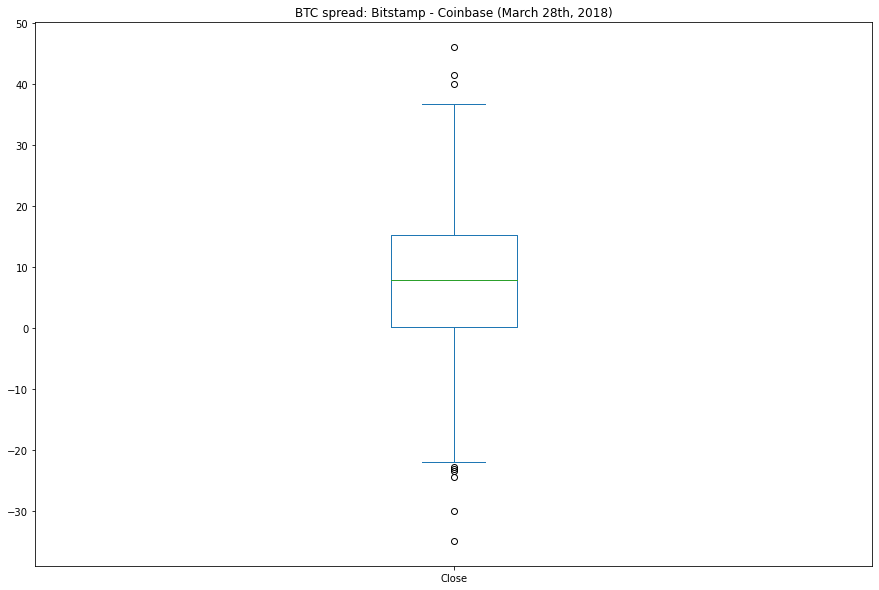

In [31]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', legend=True, figsize=(15, 10), title="BTC spread: Bitstamp - Coinbase (March 28th, 2018)")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that has been selected in the previous section. The goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange we're buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down the trading opportunities even further. To do so, determine the number of times trades with positive returns exceed the 1% minimum threshold that are needed to cover transaction costs.

4. Generate the summary statistics of the spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Identify patterns or trends in the profits across the three time periods.


#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.


In [32]:
# Arbitrage Early Timeframe
# Use a conditional statement to generate the summary statistics for arbitrage_spread_early DataFrame, where the spread is greater than zero

arbitrage_spread_early[arbitrage_spread_early>0].describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [33]:
# Arbitrage Middle Timeframe 
# Use a conditional statement to generate the summary statistics for arbitrage_spread_middle DataFrame, where the spread is greater than zero

arbitrage_spread_middle[arbitrage_spread_middle>0].describe()

count    1080.000000
mean       12.486259
std         8.128835
min         0.010000
25%         6.060000
50%        11.260000
75%        17.875000
max        46.000000
Name: Close, dtype: float64

In [34]:
# Arbitrage Late Timeframe
# Use a conditional statement to generate the summary statistics for arbitrage_spread_late DataFrame, where the spread is greater than zero

arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    1028.000000
mean        7.853317
std         5.521699
min         0.010000
25%         3.710000
50%         6.880000
75%        10.712500
max        28.730000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange we're buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [35]:
# For the early date in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange we're buying on (the lower-priced exchange).
arbitrage_spread_early_return = arbitrage_spread_early[arbitrage_spread_early>0] / coinbase['Close'].loc['2018-01-28']
arbitrage_spread_early_return 

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
                         ...   
2018-01-28 23:55:00    0.019518
2018-01-28 23:56:00    0.017302
2018-01-28 23:57:00    0.018510
2018-01-28 23:58:00    0.017303
2018-01-28 23:59:00    0.017094
Name: Close, Length: 1440, dtype: float64

In [36]:
# For the middle date in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange we're buying on (the lower-priced exchange).
arbitrage_spread_middle_return = arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase['Close'].loc['2018-02-28']
arbitrage_spread_middle_return

Timestamp
2018-02-28 00:00:00    0.001482
2018-02-28 00:01:00    0.001317
2018-02-28 00:02:00         NaN
2018-02-28 00:03:00    0.000604
2018-02-28 00:04:00         NaN
                         ...   
2018-02-28 23:55:00    0.000832
2018-02-28 23:56:00         NaN
2018-02-28 23:57:00    0.000123
2018-02-28 23:58:00    0.002203
2018-02-28 23:59:00    0.002902
Name: Close, Length: 1439, dtype: float64

In [37]:
# For the late date in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange we're buying on (the lower-priced exchange).

arbitrage_spread_late_return = arbitrage_spread_late[arbitrage_spread_late>0] / coinbase['Close'].loc['2018-03-28']
arbitrage_spread_late_return

Timestamp
2018-03-28 00:00:00         NaN
2018-03-28 00:01:00         NaN
2018-03-28 00:02:00         NaN
2018-03-28 00:03:00    0.001122
2018-03-28 00:04:00    0.000778
                         ...   
2018-03-28 23:55:00    0.000205
2018-03-28 23:56:00    0.000203
2018-03-28 23:57:00    0.000103
2018-03-28 23:58:00    0.000883
2018-03-28 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64

#### 3. For each of the three dates, narrow down the trading opportunities even further. To do so, determine the number of times trades with positive returns exceed the 1% minimum threshold that are needed to cover transaction costs.

In [38]:
# For the early date in the dataset, determine the number of times trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = arbitrage_spread_early_return[arbitrage_spread_early_return > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [39]:
# For the middle date in the dataset, determine the number of times trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = arbitrage_spread_middle_return[arbitrage_spread_middle_return > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [40]:
# For the late date in the dataset, determine the number of times trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = arbitrage_spread_late_return[arbitrage_spread_late_return > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of the spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [41]:
# Print the summary statistics for the profitable_trades_early DataFrame
profitable_trades_early.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

In [42]:
# Print the summary statistics for the profitable_trades_middle DataFrame
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [43]:
# Print the summary statistics for the profitable_trades_late DataFrame
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [44]:
# For the early date in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
early_profit = profitable_trades_early * coinbase['Close'].loc['2018-01-28']
early_profit

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1440, dtype: float64

In [45]:
# Drop any missing values from the early_profit DataFrame
profit_per_trade_early = early_profit.dropna()

# View the profit_per_trade_early DataFrame
profit_per_trade_early

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1378, dtype: float64

In [46]:
# For the middle date in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
middle_profit = profitable_trades_middle * coinbase['Close'].loc['2018-02-28']
middle_profit

Timestamp
2018-02-28 00:00:00   NaN
2018-02-28 00:01:00   NaN
2018-02-28 00:02:00   NaN
2018-02-28 00:03:00   NaN
2018-02-28 00:04:00   NaN
                       ..
2018-02-28 23:55:00   NaN
2018-02-28 23:56:00   NaN
2018-02-28 23:57:00   NaN
2018-02-28 23:58:00   NaN
2018-02-28 23:59:00   NaN
Name: Close, Length: 1439, dtype: float64

In [47]:
# Drop any missing values from the middle_profit DataFrame
profit_per_trade_middle = middle_profit.dropna()

# View the profit_per_trade_middle DataFrame
profit_per_trade_middle

Series([], Name: Close, dtype: float64)

In [48]:
# For the late date in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
late_profit = profitable_trades_late * coinbase['Close'].loc['2018-03-28']
late_profit

Timestamp
2018-03-28 00:00:00   NaN
2018-03-28 00:01:00   NaN
2018-03-28 00:02:00   NaN
2018-03-28 00:03:00   NaN
2018-03-28 00:04:00   NaN
                       ..
2018-03-28 23:55:00   NaN
2018-03-28 23:56:00   NaN
2018-03-28 23:57:00   NaN
2018-03-28 23:58:00   NaN
2018-03-28 23:59:00   NaN
Name: Close, Length: 1440, dtype: float64

In [49]:
# Drop any missing values from the late_profit DataFrame
profit_per_trade_late = late_profit.dropna()

# View the profit_per_trade_late DataFrame
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [50]:
# Generate the summary statistics for the profit_per_trade_early DataFrame
profit_per_trade_early.describe()

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Profits Per Trade, January 28th, 2018'}, xlabel='Timestamp'>

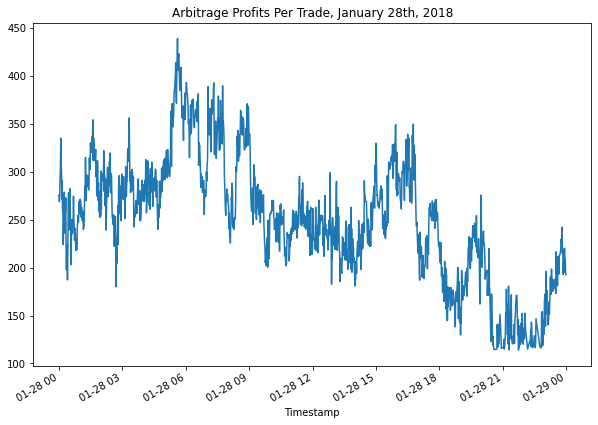

In [51]:
# Plot the results for the profit_per_trade_early DataFrame
profit_per_trade_early.plot(figsize=(10, 7), title="Arbitrage Profits Per Trade, January 28th, 2018")

In [52]:
# Generate the summary statistics for the profit_per_trade_middle DataFrame
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Profits Per Trade, February 28th, 2018'}, xlabel='Timestamp'>

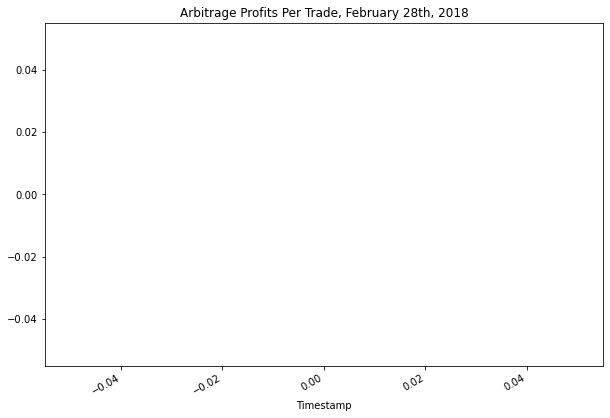

In [53]:
# Plot the results for the profit_per_trade_middle DataFrame
profit_per_trade_middle.plot(figsize=(10, 7), title="Arbitrage Profits Per Trade, February 28th, 2018")

In [54]:
# Generate the summary statistics for the profit_per_trade_late DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Profits Per Trade, March 28th, 2018'}, xlabel='Timestamp'>

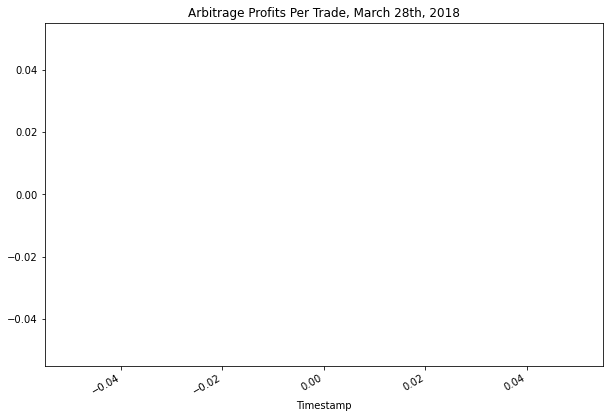

In [55]:
# Plot the results for the profit_per_trade_late DataFrame
profit_per_trade_late.plot(figsize=(10, 7), title="Arbitrage Profits Per Trade, March 28th, 2018")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [56]:
# Calculate the sum of the potential profits for the profit_per_trade_early DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

349918.2900000001

In [57]:
# Calculate the sum of the potential profits for the profit_per_trade_middle DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

0.0

In [58]:
# Calculate the sum of the potential profits for the profit_per_trade_late DataFrame
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Identify patterns or trends in the profits across the three time periods.

In [59]:
# Use the cumsum function to calculate the cumulative profits over time for profit_per_trade_early DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Arbitrage Profits, January 28th, 2018'}, xlabel='Timestamp'>

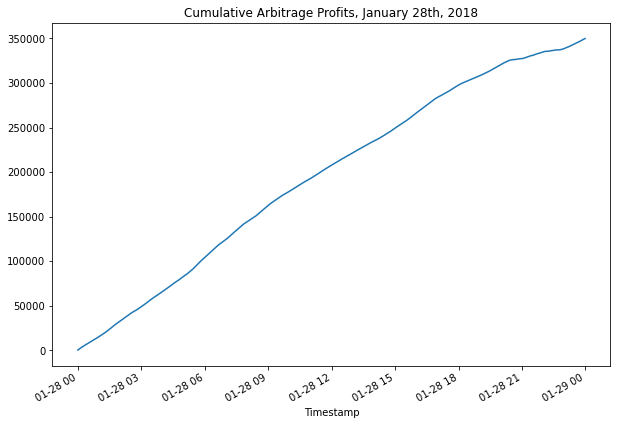

In [60]:
# Plot the cumulative sum of profits for the profit_per_trade_early DataFrame
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Arbitrage Profits, January 28th, 2018")

In [61]:
# Use the cumsum function to calculate the cumulative profits over time for the profit_per_trade_middle DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Arbitrage Profits, February 28th, 2018'}, xlabel='Timestamp'>

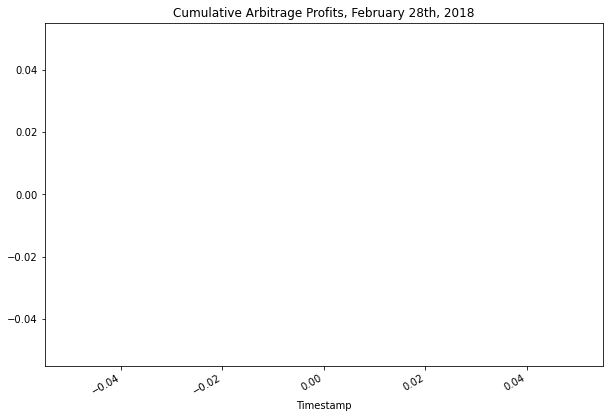

In [62]:
# Plot the cumulative sum of profits for the profit_per_trade_middle DataFrame
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Arbitrage Profits, February 28th, 2018")

In [63]:
# Use the cumsum function to calculate the cumulative profits over time for the profit_per_trade_late DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Arbitrage Profits, March 28th, 2018'}, xlabel='Timestamp'>

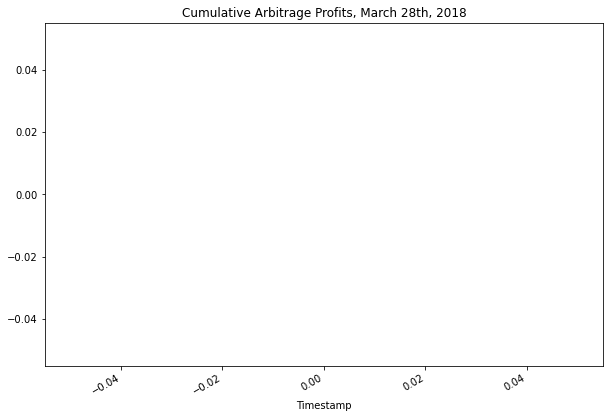

In [64]:
# Plot the cumulative sum of profits for the profit_per_trade_late DataFrame
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Arbitrage Profits, March 28th, 2018")

## Conclusion
* From the days I analyzed it is clear that Arbitrage oportunities decreased from January to March, as shown by the fact that there were zero profitable arbitrage trades on the middle date (February 28th) and the later date (March 28th). This conclusion is further supported by the decreasing number of arbitrage spread values greater than zero (January 28th = 1436, February 28th = 1080, March 28th = 1028). 